In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2
%matplotlib inline

In [16]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from SepMe.processing.batchprocessing import *
batch_files = '../data/mturk_samples/task/results/'
processed_files = '../data/mturk_samples/task/processed/'
qual_files = '../data/mturk_samples/task/qualifications/'
check_file = '../data/orig_data/human_reduced_results.csv'

figs = '../data/mturk_samples/task/result_figures/'

green = '#029e73'
pink  = '#cc78bc'
blue = '#56b4e9'


colors = ['#0173b2',
    '#de8f05',
    '#029e73',
    '#d55e00',
    '#fbafe4',
    '#949494',
    '#ece133',
    '#56b4e9',
    '#cc78bc',
    '#ca9161']

In [21]:
payment = 0.12
dfs = []

cols = []
for file in os.listdir(batch_files):
    
    if file.startswith('proc') or file.startswith('.'):
        continue
    
    
    df = append_test_data(batch_files  + file, check_file)
    df['Reward'] = np.round(df['Reward'].str.lstrip('$').astype('float64'),2)
    time = np.floor(np.mean(df['WorkTimeInSeconds']))
    reward = np.round(np.mean(df['Reward']),2)
    df['ShouldReward'] = payment*(time/60)
    
    if file.startswith('training'):
        df['phase'] = 'training'
        #print('Training')
        df['ShouldReward'] = df['Reward']

    else:
        df['phase'] = 'task'
        #print('Task')
       
    df['type'] = 'abstract'
    if 'semantic' in file:
        df['type'] = 'semantic'
        
    df['1v1'] = False
    if '1v1' in file:
        df['1v1'] = True

    cols.append(set(list(df.columns)))
    if file.startswith('task'):
        print(file)
        print(df.shape)
        print('Expiration date: {}'.format(df.loc[0,'Expiration']))
        print('Workers: {}'.format(len(set(df['WorkerId']))))
        print('{} seconds - {} reward - {} should'.format(np.round(np.mean(df['WorkTimeInSeconds']), 2), 
                                            np.round(np.mean(df['Reward']),2),
                                            np.round(np.mean(df['ShouldReward']),2)             ))
        print('') 
    else: 
        pass
    
#     f, axes = plt.subplots(1, figsize=(5, 5))
#     sns.distplot(df['WorkTimeInSeconds'])

    dfs.append(df)
    
    

df = pd.concat(dfs, axis=0, sort=True)
df_agg = aggregate_batch(df)

df.to_csv(processed_files + 'batches_combined.csv', index=False)

print(df.columns)
print(np.sum(df['ShouldReward']- df['Reward']))
df




task_abstract_Batch_3848359_batch_results.csv
(240, 49)
Expiration date: Mon Dec 02 10:03:21 PST 2019
Workers: 53
62.84 seconds - 0.1 reward - 0.12 should

task_semantic_1v1_Batch_3868234_batch_results.csv
(7396, 49)
Expiration date: Fri Dec 20 07:33:31 PST 2019
Workers: 53
29.45 seconds - 0.02 reward - 0.06 should

task_abstract_Batch_3863742_batch_results.csv
(720, 50)
Expiration date: Thu Dec 19 09:43:10 PST 2019
Workers: 20
47.55 seconds - 0.06 reward - 0.09 should

task_semantic_Batch_3887706_batch_results.csv
(665, 56)
Expiration date: Fri Jan 17 09:06:37 PST 2020
Workers: 112
850.66 seconds - 0.09 reward - 1.7 should

task_abstract_1v1_Batch_3867424_batch_results.csv
(2790, 49)
Expiration date: Fri Dec 13 04:39:40 PST 2019
Workers: 37
17.22 seconds - 0.01 reward - 0.03 should

task_semantic_Batch_3863734_batch_results.csv
(1981, 54)
Expiration date: Mon Dec 16 09:34:30 PST 2019
Workers: 44
47.97 seconds - 0.05 reward - 0.09 should

task_abstract_1v1_Batch_3868237_batch_results.c

,1v1,AcceptTime,ApprovalTime,Approve,AssignmentDurationInSeconds,AssignmentId,AssignmentStatus,AutoApprovalDelayInSeconds,AutoApprovalTime,CreationTime,...,phase,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,type
0,False,Mon Nov 25 10:05:14 PST 2019,Tue Nov 26 12:45:17 PST 2019,NaN,180,34QN5IT0T0W4HZEORUWGG4MT82780A,Approved,432000,Sat Nov 30 10:05:52 PST 2019,Mon Nov 25 10:03:21 PST 2019,...,task,73.0,76.0,76.0,NaN,NaN,NaN,NaN,NaN,abstract
1,False,Mon Nov 25 10:06:58 PST 2019,Tue Nov 26 12:45:17 PST 2019,NaN,180,3FQ5JJ512MTRXW8W1PVHHLRXBVCKNG,Approved,432000,Sat Nov 30 10:08:15 PST 2019,Mon Nov 25 10:03:21 PST 2019,...,task,83.0,84.0,85.0,NaN,NaN,NaN,NaN,NaN,abstract
2,False,Mon Nov 25 10:06:56 PST 2019,Tue Nov 26 12:45:17 PST 2019,NaN,180,3IJXV6UZ1YOL6ZA0UTRMDPHUKOCIRR,Approved,432000,Sat Nov 30 10:08:51 PST 2019,Mon Nov 25 10:03:21 PST 2019,...,task,72.0,69.0,79.0,NaN,NaN,NaN,NaN,NaN,abstract
3,False,Mon Nov 25 10:07:21 PST 2019,Tue Nov 26 12:45:17 PST 2019,NaN,180,3RU7GD8VPPYPO0XHMDHBCWN2S4QPSY,Approved,432000,Sat Nov 30 10:08:02 PST 2019,Mon Nov 25 10:03:21 PST 2019,...,task,77.0,80.0,80.0,NaN,NaN,NaN,NaN,NaN,abstract
4,False,Mon Nov 25 10:06:00 PST 2019,Tue Nov 26 12:45:18 PST 2019,NaN,180,3YT88D1N093KTSFMJ6B287TR6ELK30,Approved,432000,Sat Nov 30 10:07:33 PST 2019,Mon Nov 25 10:03:21 PST 2019,...,task,83.0,81.0,79.0,NaN,NaN,NaN,NaN,NaN,abstract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,True,Thu Dec 12 09:21:54 PST 2019,Fri Dec 13 04:40:30 PST 2019,NaN,300,3VHHR074H4MDEHYR6IQT0OIM4Z47LT,Approved,604800,Thu Dec 19 09:22:13 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,training,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
604,True,Thu Dec 12 09:22:46 PST 2019,Fri Dec 13 04:40:30 PST 2019,NaN,300,3WETL7AQWUDHB9UJCJ7W6IA9D7I53Y,Approved,604800,Thu Dec 19 09:23:03 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,training,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
605,True,Thu Dec 12 09:16:39 PST 2019,Fri Dec 13 04:40:30 PST 2019,NaN,300,3X4JMASXCNENJXCVU6GQ76CUKRJ0BY,Approved,604800,Thu Dec 19 09:16:54 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,training,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
606,True,Thu Dec 12 09:16:57 PST 2019,Fri Dec 13 04:40:30 PST 2019,NaN,300,3YHH42UU5CKZW6Y7LJ5KL98ZWLX0LL,Approved,604800,Thu Dec 19 09:17:30 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,training,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract


In [22]:
df.loc[df['Reward']==0.09]

,1v1,AcceptTime,ApprovalTime,Approve,AssignmentDurationInSeconds,AssignmentId,AssignmentStatus,AutoApprovalDelayInSeconds,AutoApprovalTime,CreationTime,...,phase,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,type
0,False,Fri Jan 10 09:12:27 PST 2020,NaN,NaN,7200,339ANSOTR67ZJVX549IPCDVGW8FKIS,Submitted,864000,Mon Jan 20 09:31:27 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,task,17.0,12.0,23.0,NaN,NaN,NaN,NaN,NaN,semantic
1,False,Fri Jan 10 09:10:23 PST 2020,NaN,NaN,7200,39JEC7537V6MM35HB30A3J82Z11VCM,Submitted,864000,Mon Jan 20 09:10:34 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,task,21.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,semantic
2,False,Fri Jan 10 09:12:08 PST 2020,NaN,NaN,7200,3DL65MZB8EK5KSJVGDB03FKGZ6ZCEY,Submitted,864000,Mon Jan 20 09:15:43 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,task,78.0,73.0,76.0,NaN,NaN,NaN,NaN,NaN,semantic
3,False,Fri Jan 10 09:07:52 PST 2020,NaN,NaN,7200,3TDXMTX3CCZSKGCG25OO2UQYVDTI6J,Submitted,864000,Mon Jan 20 09:08:45 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,task,86.0,83.0,88.0,NaN,NaN,NaN,NaN,NaN,semantic
4,False,Fri Jan 10 09:23:36 PST 2020,NaN,NaN,7200,3YDGXNSEO0ZLGNWPAVJIS7C6WQO84M,Submitted,864000,Mon Jan 20 10:37:08 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,task,85.0,79.0,79.0,NaN,NaN,NaN,NaN,NaN,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,False,Fri Jan 10 09:18:07 PST 2020,NaN,NaN,7200,3Q5C1WP23N6L16G4PFTDIPVCIGB512,Submitted,864000,Mon Jan 20 09:26:28 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,task,8.0,35.0,61.0,22.0,NaN,NaN,NaN,NaN,semantic
272,False,Fri Jan 10 09:14:39 PST 2020,NaN,NaN,7200,3QBD8R3Z22OO1FJ5HC8EPT26BVP4OI,Submitted,864000,Mon Jan 20 09:15:16 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,task,77.0,63.0,96.0,69.0,NaN,NaN,NaN,NaN,semantic
273,False,Fri Jan 10 09:09:18 PST 2020,NaN,NaN,7200,3QY7M81QH8R2UBG9LIESLO57IS3K7W,Submitted,864000,Mon Jan 20 09:26:37 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,task,17.0,57.0,82.0,28.0,NaN,NaN,NaN,NaN,semantic
274,False,Fri Jan 10 09:09:34 PST 2020,NaN,NaN,7200,3TXMY6UCAFTUHV90P460XW9UI9MCQ9,Submitted,864000,Mon Jan 20 09:16:24 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,task,76.0,64.0,80.0,57.0,NaN,NaN,NaN,NaN,semantic


In [38]:
cols =[]
dfs = []
workers = []
alr_workers = []
for pp in set(df['phase']):
    print(pp)
    for tt in set(df['type']):
        for vv in set(df['1v1']):
            print('Phase: {}  Task Type: {}  1v1: {}'.format(pp,tt,vv))
            print('--------------------------')
            
            df1 = df.loc[(df['type']==tt) & (df['1v1']==vv) & (df['phase']==pp), :].copy()
            if len(df1)==0:
                print('\n\n')
                continue
            
            if vv == True:
                df1 = self_clean(df1, majority=.55, neg=40, pos=60, min_passes = 4)
                #print(df1['total_recordings'])

            else: 
                df1 = self_clean(df1, majority=.6, neg=40, pos=60, min_passes = 2)

            print(df1.shape)
            print('Expiration date: {}'.format(df1.loc[0,'Expiration']))
            print('Workers: {}'.format(len(set(df1['WorkerId']))))
            
            time = np.floor(np.mean(df1['WorkTimeInSeconds']))
            print('Average Completion time: {} seconds'.format(time))
            reward = np.round(np.mean(df1['Reward']),2)
            if df1['Reward'].isna().sum() >0:
                print('!!!!!!rewards nans {}'.format(df1['Reward'].isna().sum()))
        
        
            
            df1['ShouldReward_2'] = np.round(payment*(time/60),2)
            

                
            should_reward=np.round(np.mean(df1['ShouldReward_2']),2)
            
            print('Reward:${}  Should2:${}'.format(reward, should_reward))
            
            
            print('\n\n')
            
            
#             f, axes = plt.subplots(1, figsize=(10, 5))
#             sns.distplot(df1['WorkTimeInSeconds']).set_title('{}-{}-1v1:{} - avg: {} - rew: {} - should {}'.format(pp,
#                                                                                              tt,
#                                                                                              vv, 
#                                                                                              time, 
#                                                                                              reward, 
#                                                                                              should_reward))
            
#             if len( df1.loc[df1['total_recordings']>15,:])>0:
#                 df1.loc[df1['total_recordings']>15,:].to_csv('{}{}_{}_1v1-{}_size-{}_over15.csv'.format(
#                                 processed_files, pp, tt, vv, df1.shape[0]), index=False)
            
            
#             if len( df1.loc[df1['total_recordings']<=15,:])>0:
#                 print('HITs under 15: {}'.format(len( df1.loc[df1['total_recordings']<=15,:])))
#                 df1.loc[df1['total_recordings']<=15,'Approve'] = 'X'
#                 df1.loc[df1['total_recordings']<=15,:].to_csv('{}{}_{}_1v1-{}_size-{}_under15.csv'.format(
#                                     processed_files, pp, tt, vv, df1.shape[0]), index=False)
            
            
            workerId = list(set(df1['WorkerId']))
            qualification = pd.DataFrame({"Worker ID": workerId})
            
            
            if pp == 'training':
                if vv == True:
                    if tt == 'semantic':
                        name = 'completed_training_b'
                    else:
                        name = 'completed_training_a'

                else:
                    if tt == 'semantic':
                        name = 'completed_country'
                    else:
                        name = 'completed_first_scatterplot'
                    
                qualification["UPDATE-{}".format(name)] = 1
                qualification.to_csv('{}qualification_{}.csv'.format(qual_files,name) , index=False)
                
                
            if pp == 'task':
                if vv == True:
                    if tt == 'semantic':
                        name = 'completed_training_b'
                    else:
                        name = 'completed_training_a'

                else:
                    if tt == 'semantic':
                        print(df1.shape)
                        df2 = df1.loc[df1['Reward']>0.07, :]
                        
                        df1.loc[df1['Reward']==0.09].to_csv('semantic_only.csv', index=False)
                        name = 'completed_country'
                    else:
                        name = 'completed_first_scatterplot'
                
                qual = pd.read_csv(qual_files + 'qualification_{}.csv'.format(name))
                
                all_workers = set(list(qual['Worker ID']))
                already_workers = set(workerId)
                
#                print("Workers who didn't work yet: {}".format(len(all_workers - already_workers)))
                workers += list(all_workers - already_workers)
                alr_workers +=  list(already_workers)
                
            cols.append(list(df1.columns))
            dfs.append(df1)
#             wid = 'A226S9LUL53Q01'
#             hits = ['3CRWSLD91K91ILBHXD39M3NKD29MOQ', '356TQKY9XF2FCQHEMQCO6Z0U38A78X']
            
#             if len((df1.loc[df1['WorkerId'].isin([wid]), :])) >0:
#                 print('Approving -----')
#                 df1.loc[df1['WorkerId'].isin([wid]), 'Approve'] = 'X'
#                 df1.loc[df1['WorkerId'].isin([wid]), 'Reject'] = None
#                 print(len(df1.loc[df1['WorkerId'].isin([wid]), :]))
                
#                 df1.loc[df1['WorkerId'].isin([wid]), :].to_csv('gunduz.csv', index=False)



df1 = pd.concat(dfs, axis=0, sort=True)
df1.to_csv('all.csv', index=False)

pd.Series(workers).to_csv(qual_files +'notify_workers.csv', index=False)
pd.Series(alr_workers).to_csv(qual_files +'already_workers.csv', index=False)



print('Should pay1: {}; Should pay2: {}'.format(np.sum(df1['ShouldReward']- df1['Reward']), 
                                                np.sum(df1['ShouldReward_2']- df1['Reward'])))

task
Phase: task  Task Type: semantic  1v1: False
--------------------------
Retain rate for minimum 2 passes is: 98.07096107475026% 
(2922, 71)
Expiration date: Fri Jan 17 09:06:37 PST 2020
Workers: 173
Average Completion time: 294.0 seconds
Reward:$0.06  Should2:$0.59



(2922, 72)
Phase: task  Task Type: semantic  1v1: True
--------------------------
Retain rate for minimum 4 passes is: 83.89624930024259% 
(7396, 71)
Expiration date: Fri Dec 20 07:33:31 PST 2019
Workers: 53
Average Completion time: 29.0 seconds
Reward:$0.02  Should2:$0.06



Phase: task  Task Type: abstract  1v1: False
--------------------------
Retain rate for minimum 2 passes is: 92.33588803732088% 
(3161, 71)
Expiration date: Mon Dec 02 10:03:21 PST 2019
Workers: 71
Average Completion time: 37.0 seconds
Reward:$0.06  Should2:$0.07



Phase: task  Task Type: abstract  1v1: True
--------------------------
Retain rate for minimum 4 passes is: 87.31031866464339% 
(7290, 71)
Expiration date: Fri Dec 13 04:39:40 PST 20

/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:133: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:134: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [24]:
processed_files

'../data/mturk_samples/task/processed/'

In [25]:
df1.columns

Index(['1v1', 'AcceptTime', 'ApprovalTime', 'Approve',
       'AssignmentDurationInSeconds', 'AssignmentId', 'AssignmentStatus',
       'AutoApprovalDelayInSeconds', 'AutoApprovalTime', 'CreationTime',
       'Description', 'Expiration', 'HITId', 'HITTypeId', 'HITname',
       'Input.WorkerId', 'Input.class_set', 'Input.e', 'Input.file_name',
       'Input.i', 'Input.image_url', 'Keywords', 'Last30DaysApprovalRate',
       'Last7DaysApprovalRate', 'LifetimeApprovalRate', 'LifetimeInSeconds',
       'MaxAssignments', 'NumberOfSimilarHITs', 'Reject', 'RejectionTime',
       'RequesterAnnotation', 'RequesterFeedback', 'Reward', 'ShouldReward',
       'ShouldReward_2', 'SubmitTime', 'Title', 'WorkTimeInSeconds',
       'WorkerId', 'ap.1', 'ap.2', 'ap.3', 'ap.4', 'fileName', 'mp.1', 'mp.2',
       'mp.3', 'mp.4', 'pass1', 'pass2', 'pass3', 'pass4', 'passes', 'phase',
       'pneg1', 'pneg2', 'pneg3', 'pneg4', 'ppos1', 'ppos2', 'ppos3', 'ppos4',
       'sep1', 'sep2', 'sep3', 'sep4', 'sep5',

## Pay them real money.

In [26]:
print(df1.shape)
print('Should pay1: {}; Should pay2: {}'.format(np.sum(df1['ShouldReward']- df1['Reward']), 
                                                np.sum(df1['ShouldReward_2']- df1['Reward'])))


df_app = df1.loc[(df1['Approve']=='X') & (df1['phase']=='task')].copy()
print(df_app.shape)

print('Should pay1: {}; Should pay2: {}'.format(np.sum(df_app['ShouldReward']- df_app['Reward']), 
                                                np.sum(df_app['ShouldReward_2']- df_app['Reward'])))

df_app = df1.loc[(df1['Approve']=='X') & (df1['phase']=='task')]
df_app['to_pay'] = df_app['ShouldReward_2']- df_app['Reward']

print(df_app.columns)

payment_df = df_app.groupby(['WorkerId', 'AssignmentId', 'HITId']).agg({'to_pay':{'sum'}}).reset_index()
payment_df.columns = ['WorkerId','AssignmentId', 'HITId', 'to_pay']
payment_df['to_pay'] = np.round(payment_df['to_pay'] , 2)
print(np.sum(payment_df.to_pay))


payment_df.to_csv('bonus.csv', index=False)
payment_df




(22257, 72)
Should pay1: 1950.1679999999994; Should pay2: 2032.0099999999998
(18116, 72)
Should pay1: 1836.9559999999997; Should pay2: 1861.8299999999997
Index(['1v1', 'AcceptTime', 'ApprovalTime', 'Approve',
       'AssignmentDurationInSeconds', 'AssignmentId', 'AssignmentStatus',
       'AutoApprovalDelayInSeconds', 'AutoApprovalTime', 'CreationTime',
       'Description', 'Expiration', 'HITId', 'HITTypeId', 'HITname',
       'Input.WorkerId', 'Input.class_set', 'Input.e', 'Input.file_name',
       'Input.i', 'Input.image_url', 'Keywords', 'Last30DaysApprovalRate',
       'Last7DaysApprovalRate', 'LifetimeApprovalRate', 'LifetimeInSeconds',
       'MaxAssignments', 'NumberOfSimilarHITs', 'Reject', 'RejectionTime',
       'RequesterAnnotation', 'RequesterFeedback', 'Reward', 'ShouldReward',
       'ShouldReward_2', 'SubmitTime', 'Title', 'WorkTimeInSeconds',
       'WorkerId', 'ap.1', 'ap.2', 'ap.3', 'ap.4', 'fileName', 'mp.1', 'mp.2',
       'mp.3', 'mp.4', 'pass1', 'pass2', 'pass3',

/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,WorkerId,AssignmentId,HITId,to_pay
0,A002160837SWJFPIAI7L7,31Z0PCVWULK1XU6WFRSKMFS3YI97TR,3S8A4GJRD38UJ2ZMB9I6SZK6JXF6VU,0.01
1,A002160837SWJFPIAI7L7,326O153BMJ3FPKP9G96BNL2YHIOEDY,3DTJ4WT8BDKF51XBIOQ7PTPFO69EZN,0.01
2,A002160837SWJFPIAI7L7,333U7HK6IAKN00B1UAH2K1FQMQHJDL,3VZYA8PITO3I7XYS3TKCF0GGT6R50L,0.01
3,A002160837SWJFPIAI7L7,336KAV9KYRXQSF8KJLYOY53A230Y2K,3ZQA3IO31BW4MWPS4RKB2BZHFT21OP,0.01
4,A002160837SWJFPIAI7L7,336YQZE83WJIXV2TI1CB2HJFD3DM5J,3DQYSJDTYLGQ06XWH62MS894G6AXE8,0.01
...,...,...,...,...
18111,AZNIEFUIVB2H0,3XCC1ODXDMGYNXYJ71WVMR8GFSFRQH,3EGKVCRQFWXHT8BMCBMYAEARE0HYB8,0.54
18112,AZNIEFUIVB2H0,3ZGVPD4G6UMKH4C2YMK3DZL28BJZT8,3Z3R5YC0P3SBP3O877LVLN9XEWRTFW,0.54
18113,AZYF1J2X1HOH2,30OG32W0SVGOBWGM53KEJQESVU0EN6,371QPA24C2TKZOU0086AWL54E1IT12,0.04
18114,AZYF1J2X1HOH2,338JKRMM274TBNDZM0NFINR5O2YHA8,3QXFBUZ4ZKLW3GZSIWHN84VCZ48GUG,0.04


In [27]:
payment_df.loc[15794:,].groupby(['WorkerId']).agg(
    {'AssignmentId':'first', 'to_pay':'sum'}).sort_values(['to_pay'], ascending=False).reset_index().to_csv('remaining_bonuses.csv', index=False)



In [28]:
print(np.sum(payment_df.loc[15793:,'to_pay']))
print(645 - np.sum(payment_df.loc[:15793,'to_pay']))




364.42
-852.45


In [29]:
np.sum(payment_df.loc[payment_df['to_pay']>0])

WorkerId        A002160837SWJFPIAI7L7A002160837SWJFPIAI7L7A002...
AssignmentId    31Z0PCVWULK1XU6WFRSKMFS3YI97TR326O153BMJ3FPKP9...
HITId           3S8A4GJRD38UJ2ZMB9I6SZK6JXF6VU3DTJ4WT8BDKF51XB...
to_pay                                                    1868.46
dtype: object

## assignments for HIT

In [30]:
df_sem = select_df(df1)
df_sem



,1v1,AcceptTime,ApprovalTime,Approve,AssignmentDurationInSeconds,AssignmentId,AssignmentStatus,AutoApprovalDelayInSeconds,AutoApprovalTime,CreationTime,...,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,total_recordings,type
0,False,Fri Jan 10 09:12:27 PST 2020,NaN,NaN,7200,339ANSOTR67ZJVX549IPCDVGW8FKIS,Submitted,864000,Mon Jan 20 09:31:27 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,17.0,12.0,23.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
1,False,Fri Jan 10 09:10:23 PST 2020,NaN,NaN,7200,39JEC7537V6MM35HB30A3J82Z11VCM,Submitted,864000,Mon Jan 20 09:10:34 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,21.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
2,False,Fri Jan 10 09:12:08 PST 2020,NaN,X,7200,3DL65MZB8EK5KSJVGDB03FKGZ6ZCEY,Submitted,864000,Mon Jan 20 09:15:43 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,78.0,73.0,76.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
3,False,Fri Jan 10 09:07:52 PST 2020,NaN,X,7200,3TDXMTX3CCZSKGCG25OO2UQYVDTI6J,Submitted,864000,Mon Jan 20 09:08:45 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,86.0,83.0,88.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
4,False,Fri Jan 10 09:23:36 PST 2020,NaN,X,7200,3YDGXNSEO0ZLGNWPAVJIS7C6WQO84M,Submitted,864000,Mon Jan 20 10:37:08 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,85.0,79.0,79.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,False,Fri Jan 10 09:18:07 PST 2020,NaN,X,7200,3Q5C1WP23N6L16G4PFTDIPVCIGB512,Submitted,864000,Mon Jan 20 09:26:28 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,8.0,35.0,61.0,22.0,NaN,NaN,NaN,NaN,20.0,semantic
2918,False,Fri Jan 10 09:14:39 PST 2020,NaN,X,7200,3QBD8R3Z22OO1FJ5HC8EPT26BVP4OI,Submitted,864000,Mon Jan 20 09:15:16 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,77.0,63.0,96.0,69.0,NaN,NaN,NaN,NaN,20.0,semantic
2919,False,Fri Jan 10 09:09:18 PST 2020,NaN,X,7200,3QY7M81QH8R2UBG9LIESLO57IS3K7W,Submitted,864000,Mon Jan 20 09:26:37 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,17.0,57.0,82.0,28.0,NaN,NaN,NaN,NaN,20.0,semantic
2920,False,Fri Jan 10 09:09:34 PST 2020,NaN,X,7200,3TXMY6UCAFTUHV90P460XW9UI9MCQ9,Submitted,864000,Mon Jan 20 09:16:24 PST 2020,Fri Jan 10 09:07:40 PST 2020,...,76.0,64.0,80.0,57.0,NaN,NaN,NaN,NaN,20.0,semantic


0
0
142


,image_url,i,class_set,WorkerId,e
70,https://scatterplots.s3.eu-central-1.amazonaws...,10,1.0,22,-2.0
151,https://scatterplots.s3.eu-central-1.amazonaws...,5,0.0,22,-2.0
23,https://scatterplots.s3.eu-central-1.amazonaws...,6,0.0,22,-2.0
122,https://scatterplots.s3.eu-central-1.amazonaws...,3,0.0,22,-2.0
39,https://scatterplots.s3.eu-central-1.amazonaws...,8,0.0,22,-2.0
...,...,...,...,...,...
125,https://scatterplots.s3.eu-central-1.amazonaws...,3,0.0,16,4.0
29,https://scatterplots.s3.eu-central-1.amazonaws...,10,1.0,16,4.0
131,https://scatterplots.s3.eu-central-1.amazonaws...,3,0.0,16,4.0
130,https://scatterplots.s3.eu-central-1.amazonaws...,3,0.0,16,4.0


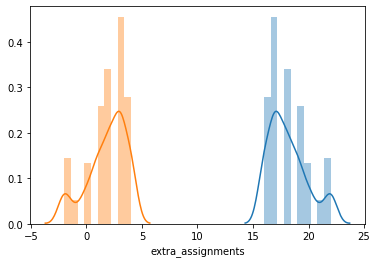

In [31]:
hits = df_sem.groupby(['Input.image_url', 'Input.i', 'Input.class_set']).agg(
    {'WorkerId': 'count'}).reset_index().sort_values(
    ['WorkerId'], ascending=False)

hits.loc[hits['WorkerId']<15]

hits['extra_assignments'] = np.ones(len(hits))*20 - hits['WorkerId']
# hits.to_csv('extra_semantic_assignemnts.csv', index=False)

# 



sns.distplot(hits['WorkerId'], bins=10)
sns.distplot(hits['extra_assignments'], bins=10)

print(len(hits.loc[hits['WorkerId']<11]))
print(len(hits.loc[hits['WorkerId'].between(11,15)]))
print(len(hits.loc[hits['WorkerId'].between(16,20)]))

hits.columns = ['image_url', 'i', 'class_set', 'WorkerId', 'e']
hits.loc[hits['WorkerId']<14]



hits.loc[hits['WorkerId']<11].to_csv('12times_semantic.csv', index=False)
hits.loc[hits['WorkerId'].between(11,15)].to_csv('5times_semantic.csv', index=False)

hits

In [35]:

planned_hits = pd.read_csv('/Users/morarica/Developer/SepMe/data/mturk_samples/task/index_all.csv')
planned_hits

set(planned_hits.image_url) - set(hits['Input.image_url'])

FileNotFoundError: [Errno 2] File b'/Users/morarica/Developer/SepMe/data/mturk_samples/task/index_all.csv' does not exist: b'/Users/morarica/Developer/SepMe/data/mturk_samples/task/index_all.csv'

In [39]:
print(df1.columns)
print(len(set(df1['Input.image_url'])))


df1

Index(['1v1', 'AcceptTime', 'ApprovalTime', 'Approve',
       'AssignmentDurationInSeconds', 'AssignmentId', 'AssignmentStatus',
       'AutoApprovalDelayInSeconds', 'AutoApprovalTime', 'CreationTime',
       'Description', 'Expiration', 'HITId', 'HITTypeId', 'HITname',
       'Input.WorkerId', 'Input.class_set', 'Input.e', 'Input.file_name',
       'Input.i', 'Input.image_url', 'Keywords', 'Last30DaysApprovalRate',
       'Last7DaysApprovalRate', 'LifetimeApprovalRate', 'LifetimeInSeconds',
       'MaxAssignments', 'NumberOfSimilarHITs', 'Reject', 'RejectionTime',
       'RequesterAnnotation', 'RequesterFeedback', 'Reward', 'ShouldReward',
       'ShouldReward_2', 'SubmitTime', 'Title', 'WorkTimeInSeconds',
       'WorkerId', 'ap.1', 'ap.2', 'ap.3', 'ap.4', 'fileName', 'mp.1', 'mp.2',
       'mp.3', 'mp.4', 'pass1', 'pass2', 'pass3', 'pass4', 'passes', 'phase',
       'pneg1', 'pneg2', 'pneg3', 'pneg4', 'ppos1', 'ppos2', 'ppos3', 'ppos4',
       'sep1', 'sep2', 'sep3', 'sep4', 'sep5',

,1v1,AcceptTime,ApprovalTime,Approve,AssignmentDurationInSeconds,AssignmentId,AssignmentStatus,AutoApprovalDelayInSeconds,AutoApprovalTime,CreationTime,...,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,total_recordings,type
0,False,Fri Jan 10 09:12:27 PST 2020,NaN,NaN,7200,339ANSOTR67ZJVX549IPCDVGW8FKIS,Submitted,864000,Mon Jan 20 09:31:27 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,17.0,12.0,23.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
1,False,Fri Jan 10 09:10:23 PST 2020,NaN,NaN,7200,39JEC7537V6MM35HB30A3J82Z11VCM,Submitted,864000,Mon Jan 20 09:10:34 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,21.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
2,False,Fri Jan 10 09:12:08 PST 2020,NaN,X,7200,3DL65MZB8EK5KSJVGDB03FKGZ6ZCEY,Submitted,864000,Mon Jan 20 09:15:43 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,78.0,73.0,76.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
3,False,Fri Jan 10 09:07:52 PST 2020,NaN,X,7200,3TDXMTX3CCZSKGCG25OO2UQYVDTI6J,Submitted,864000,Mon Jan 20 09:08:45 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,86.0,83.0,88.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
4,False,Fri Jan 10 09:23:36 PST 2020,NaN,X,7200,3YDGXNSEO0ZLGNWPAVJIS7C6WQO84M,Submitted,864000,Mon Jan 20 10:37:08 PST 2020,Fri Jan 10 09:06:37 PST 2020,...,85.0,79.0,79.0,NaN,NaN,NaN,NaN,NaN,18.0,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,True,Thu Dec 12 09:21:54 PST 2019,Fri Dec 13 04:40:30 PST 2019,X,300,3VHHR074H4MDEHYR6IQT0OIM4Z47LT,Approved,604800,Thu Dec 19 09:22:13 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,abstract
604,True,Thu Dec 12 09:22:46 PST 2019,Fri Dec 13 04:40:30 PST 2019,X,300,3WETL7AQWUDHB9UJCJ7W6IA9D7I53Y,Approved,604800,Thu Dec 19 09:23:03 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,abstract
605,True,Thu Dec 12 09:16:39 PST 2019,Fri Dec 13 04:40:30 PST 2019,X,300,3X4JMASXCNENJXCVU6GQ76CUKRJ0BY,Approved,604800,Thu Dec 19 09:16:54 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,abstract
606,True,Thu Dec 12 09:16:57 PST 2019,Fri Dec 13 04:40:30 PST 2019,X,300,3YHH42UU5CKZW6Y7LJ5KL98ZWLX0LL,Approved,604800,Thu Dec 19 09:17:30 PST 2019,Thu Dec 12 09:12:13 PST 2019,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,abstract


In [34]:
quals = pd.read_csv(qual_files+ 'User_1458362_workers.csv')
quals.columns

quals['issues'] = np.sum(quals[['CURRENT-completed_training_b',
       'CURRENT-completed_training_a',
       'CURRENT-completed_first_scatterplot',
       'CURRENT-completed_country']], axis =1)

quals.loc[quals['Worker ID'].isin(['A11N2XYG9AGJ30', 'A295A84E7LY9EU']),['Worker ID', 'issues', 'CURRENT-completed_training_b',
       'CURRENT-completed_training_a',
       'CURRENT-completed_first_scatterplot',
       'CURRENT-completed_country']].sort_values('issues', ascending = False)




,Worker ID,issues,CURRENT-completed_training_b,CURRENT-completed_training_a,CURRENT-completed_first_scatterplot,CURRENT-completed_country
6,A11N2XYG9AGJ30,1.0,NaN,NaN,NaN,1.0
124,A295A84E7LY9EU,0.0,NaN,NaN,NaN,NaN


,HITname,sep1.count,sep1.mean,sep2.count,sep2.mean,sep3.count,sep3.mean,sep4.count,sep4.mean,WorkTimeInSeconds.min,...,mp.2.min,ap.2.min,mp.3.min,ap.3.min,mp.4.min,ap.4.min,sep1.h,sep2.h,sep3.h,sep4.h
0,JavierGeneratedData_3dinterleaved_4classes_PCA,20,74.15,20,63.25,20,74.65,20,62.40,37,...,75.0,100.0,100.0,100.0,75.0,100.0,7.887521,8.634934,10.296625,11.222488
1,bbdm13_tSNE,20,54.15,20,24.65,20,24.25,20,20.65,25,...,0.0,0.0,0.0,0.0,0.0,0.0,15.236897,7.145180,10.588732,7.287362
2,boston_tSNE,20,74.40,20,66.20,20,54.65,0,NaN,27,...,50.0,50.0,75.0,75.0,NaN,NaN,10.329182,10.958672,11.845067,NaN
3,interleaved_250_500_3_0_notCramped_rotated_Gli...,20,73.50,20,72.55,20,67.25,0,NaN,16,...,100.0,100.0,100.0,100.0,NaN,NaN,8.184796,8.736602,8.775311,NaN
4,iris_RobPCA,20,83.30,20,69.40,20,68.45,0,NaN,22,...,100.0,75.0,100.0,75.0,NaN,NaN,11.184106,8.296572,8.165018,NaN
5,italianwines_tSNE,20,21.50,20,20.00,20,17.95,20,18.40,19,...,0.0,0.0,0.0,0.0,0.0,0.0,11.230806,10.300795,9.593214,9.915769
6,ms_interleaved_60_120_3d_0_centeredClusters_Ro...,20,80.45,20,77.60,20,79.00,0,NaN,27,...,100.0,100.0,100.0,100.0,NaN,NaN,8.627722,8.956732,8.392726,NaN
7,tse300_tSNE,20,24.45,20,32.25,20,25.05,20,29.30,22,...,0.0,0.0,0.0,0.0,0.0,0.0,11.586473,14.742845,11.781831,11.861431


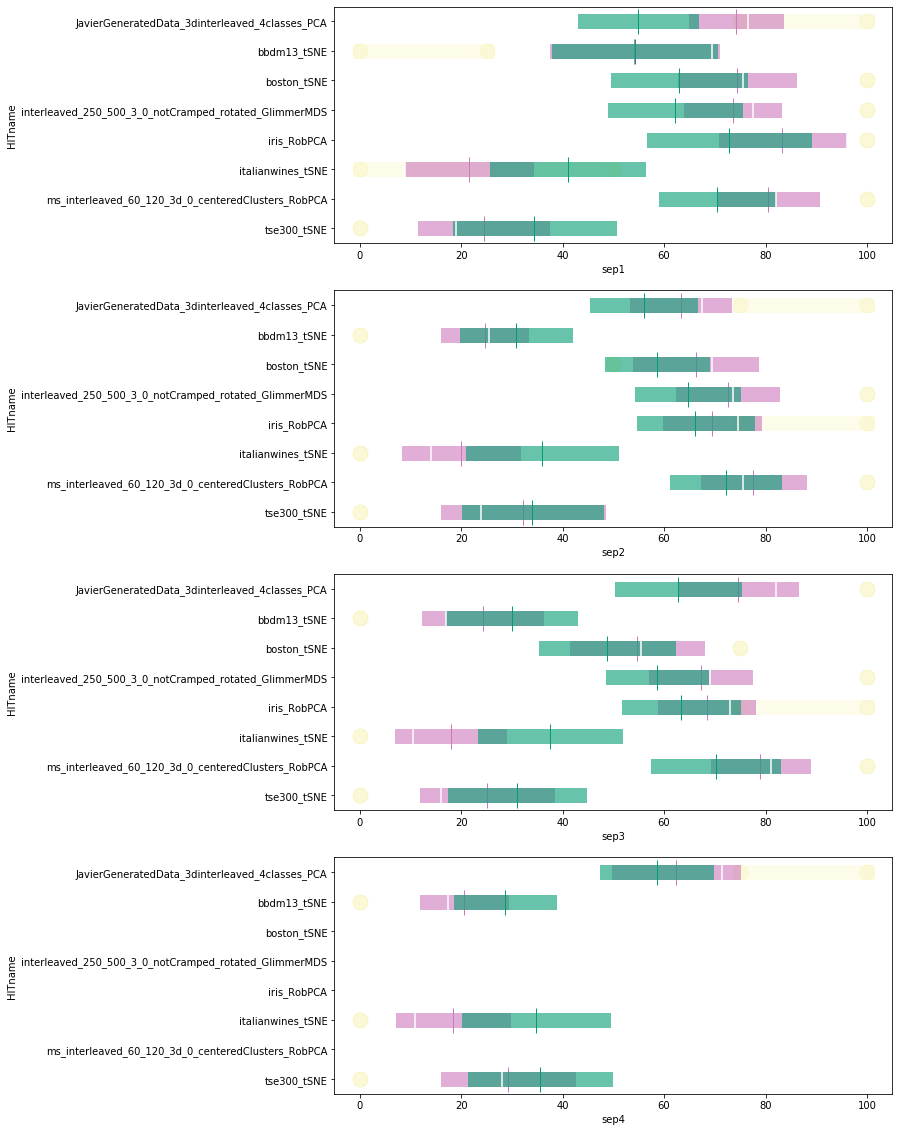

In [40]:
## df training comparison
min_passes = 2

dft_abs = df1.loc[(df1['phase']=='training') & (df1['type'] == 'abstract') & (df1['1v1'] == False)]
dft_sem = df1.loc[(df1['phase']=='training') & (df1['type'] == 'semantic') & (df1['1v1'] == False)]

df_agg_abs = aggregate_batch(dft_abs)
df_agg_sem = aggregate_batch(dft_sem)



fig, axes = get_plots(dft_abs, df_agg_abs, figsize=(10,20), alpha=0, col='white', con_col = pink
                     )

plot_extra(axes, dft_sem, df_agg_sem, green)


fig.savefig(figs + 'abs_sem_preclean.pdf')
#plot_extra(axes, df, df_agg, pink)
df_agg_abs

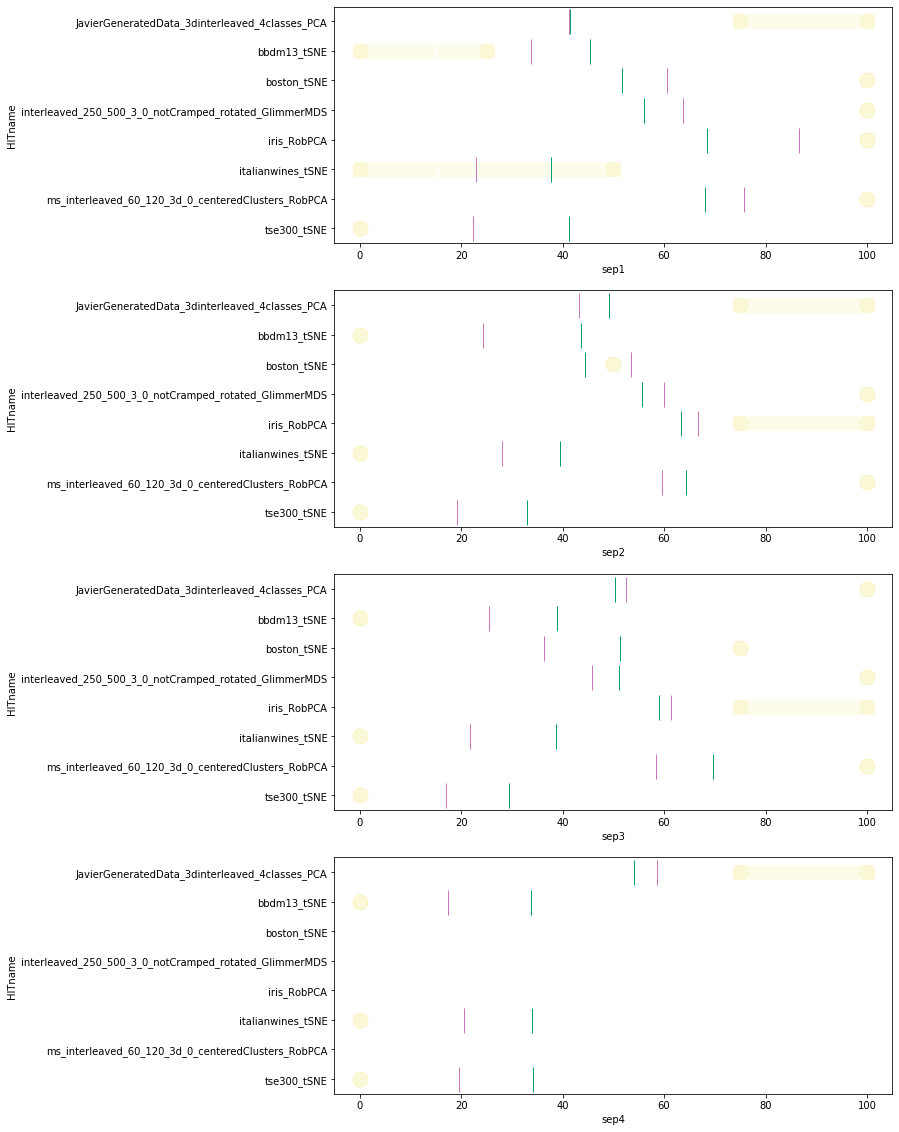

In [43]:
## df training comparison
df = df1
min_passes = 3

dft_abs = df.loc[(df1['phase']=='training') & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
dft_sem = df.loc[(df1['phase']=='training') & (df['type'] == 'semantic') & (df['passes'] >= min_passes)]

df_agg_abs = aggregate_batch(dft_abs)
df_agg_sem = aggregate_batch(dft_sem)



fig, axes = get_plots(dft_abs, df_agg_abs, figsize=(10,20), alpha=0, col='white', con_col = pink)

plot_extra(axes, dft_sem, df_agg_sem, green)


fig.savefig(figs + 'abs_sem_clean.pdf')
#plot_extra(axes, df, df_agg, pink)

/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


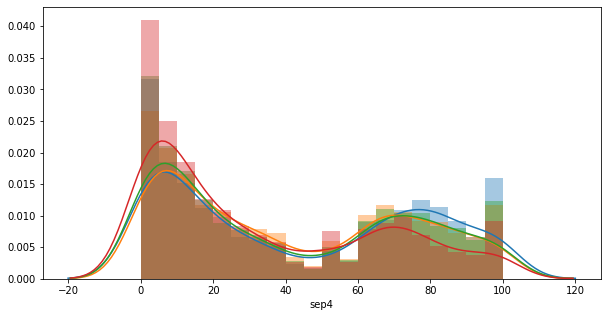

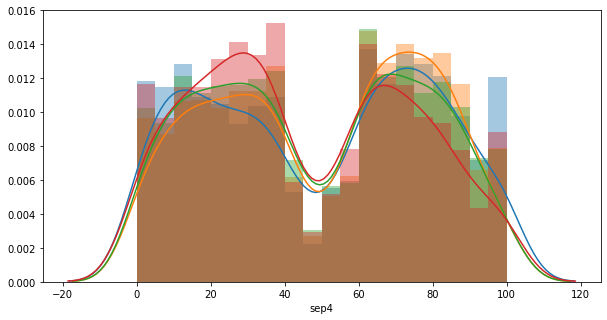

In [44]:
df2 = df.loc[(df['type'] == 'abstract') & (df['passes'] >= min_passes), :].copy()
#df1 = df.loc[(df['training']==1) & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
df1 = df.loc[(df['type'] == 'semantic') & (df['passes'] >= min_passes)]

dfs = [df2, df1]

for dd in dfs:

    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(dd.sep1, bins=20)
    sns.distplot(dd.sep2, bins=20)
    sns.distplot(dd.sep3, bins=20)
    sns.distplot(dd.sep4, bins=20)


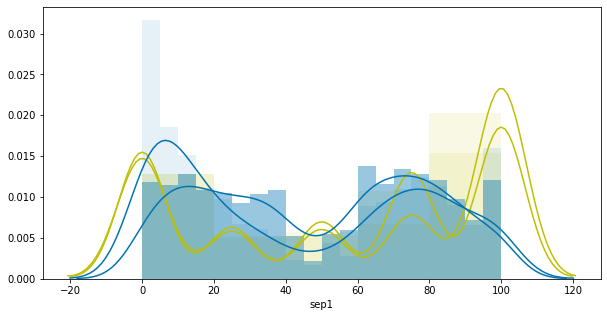

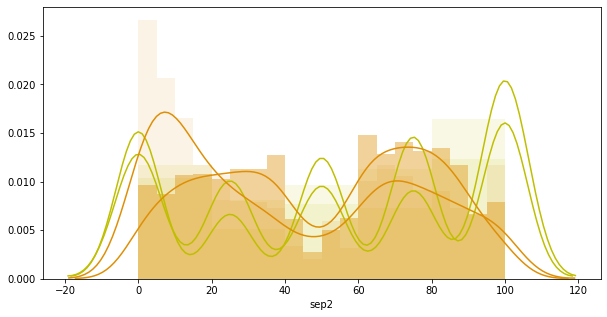

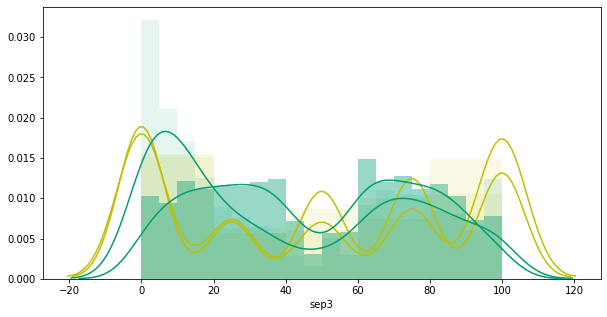

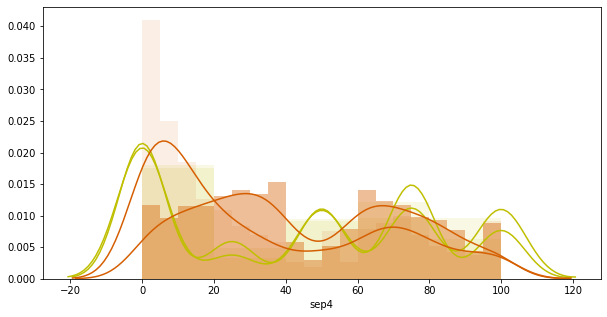

In [45]:
df2 = df.loc[(df['type'] == 'abstract') & (df['passes'] >= min_passes), :].copy()
#df1 = df.loc[(df['training']==1) & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
df1 = df.loc[(df['type'] == 'semantic') & (df['passes'] >= min_passes)]

for i in range(1,5):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(df1['mp.{}'.format(i)], bins=5, color="y", hist_kws=dict(alpha=.1))
    sns.distplot(df1['ap.{}'.format(i)], bins=5, color="y", hist_kws=dict(alpha=.1))
    sns.distplot(df1['sep{}'.format(i)], bins=20, color=colors[i-1])
    sns.distplot(df2['sep{}'.format(i)], bins=20, color=colors[i-1], hist_kws=dict(alpha=.1))


## Worker Stats

,WorkerId,type,Approve,1v1,sep1,sep2
169,A2MCG5W6LHSRG9,abstract,X,False,131,131
79,A1TIO97G4K0ZFF,abstract,X,False,129,129
82,A1ULHXPHPJRQVZ,semantic,X,False,127,127
315,A6BD7VGE58KGC,semantic,X,False,126,126
362,AMNRYECHXZY34,semantic,X,False,126,126
371,APYYV3B1MT2B6,semantic,X,False,125,125
10,A139DFNZS0I9RB,semantic,X,False,125,125
337,AF7ZV0U3CGOK0,abstract,X,False,120,120
390,AWJ0LF6A0LXJN,abstract,X,False,116,116
102,A2341KCW7BI2NS,abstract,X,False,113,113


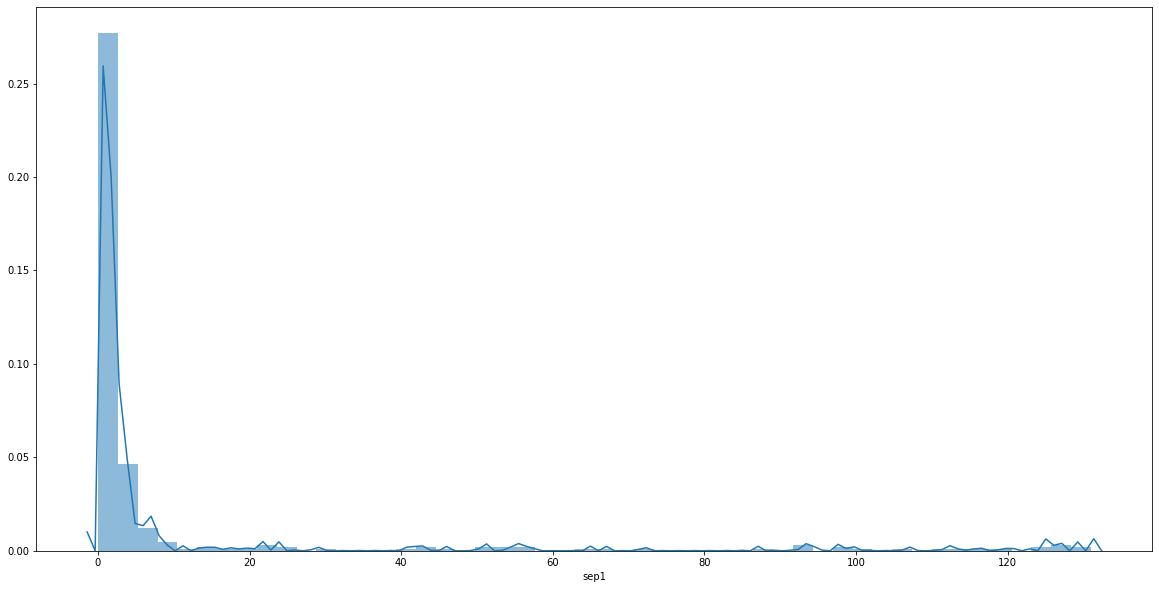

In [43]:
dfw = df.groupby(['WorkerId', 'type', 'Approve', '1v1']) \
        .agg({'sep1':'count', 'sep2':'count'}).reset_index().sort_values(['sep1'], ascending = False)


fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(dfw.loc[: ,'sep1'], hist_kws=dict(alpha=.5))

dfw.head(20)

Stats for workers with HITs between 0 and 135:
Total Workers who took the experiment: 83
-------
Average time spent in this experiment: 46.764328289775335
Median time spent in this experiment: 27.0
-------
Percentage of people between (0,15): 0.19
Percentage of people between (15,30): 0.38
Percentage of people between (30,60): 0.24
Percentage of people between (60,120): 0.14
Percentage of people between (120,180): 0.08
Percentage of people between (180,240): 0.01
Percentage of people between (240,300): 0.01



Stats for workers with HITs between 0 and 135:
Total Workers who took the experiment: 82
-------
Average time spent in this experiment: 44.44675209898365
Median time spent in this experiment: 25.0
-------
Percentage of people between (0,15): 0.23
Percentage of people between (15,30): 0.38
Percentage of people between (30,60): 0.23
Percentage of people between (60,120): 0.13
Percentage of people between (120,180): 0.07
Percentage of people between (180,240): 0.01
Percentage of peo

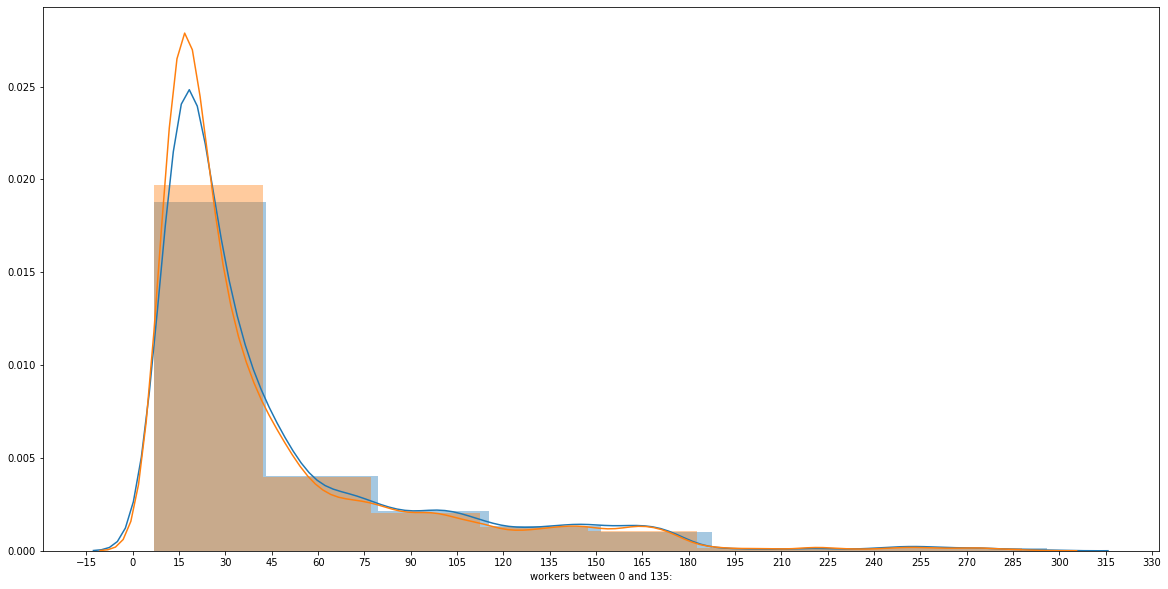

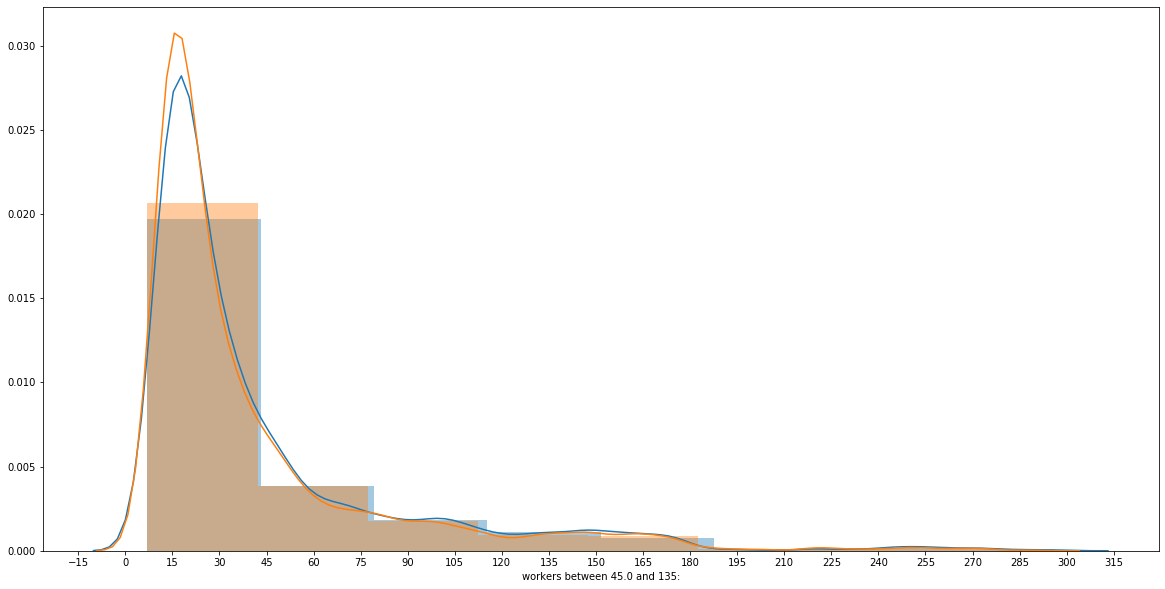

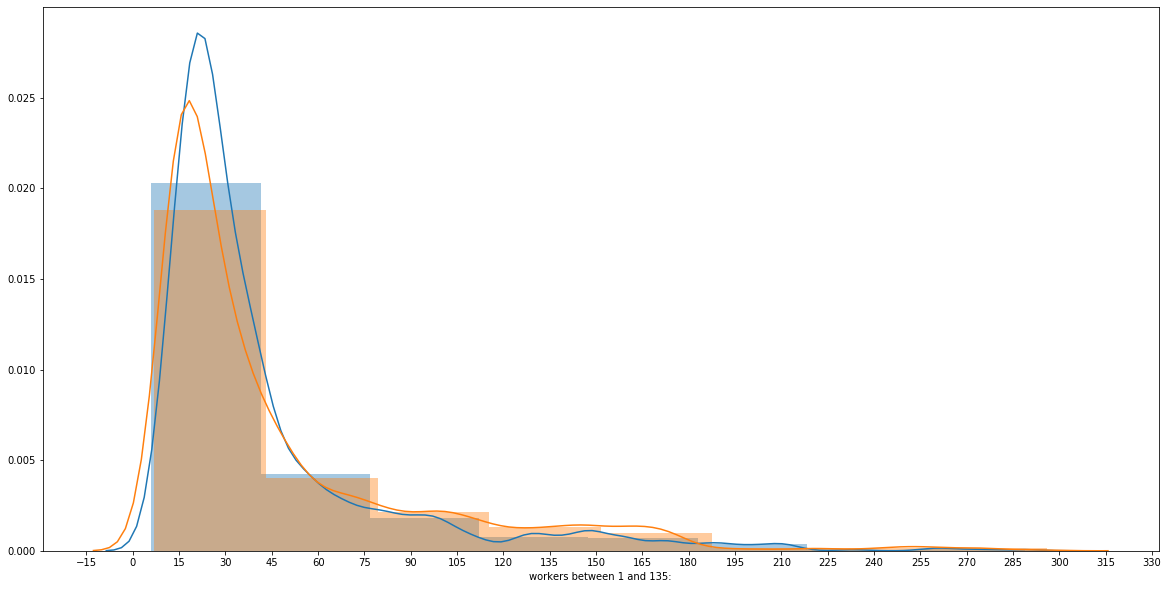

In [160]:
df1 = df.loc[(df['type'] == 'abstract'), :]
df2 = df.loc[(df['type'] == 'semantic'), :]
ss1 = 135



fig, ax = plt.subplots(figsize=(20,10))

get_slice_stats(df1, mmin=0, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1.loc[df1['passes']>=min_passes], mmin=0, mmax=ss1, bins=8, ax=ax)

fig, ax = plt.subplots(figsize=(20,10))
get_slice_stats(df1, mmin=ss1/3, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1.loc[df1['passes']>=min_passes], mmin=ss1/3, mmax=ss1, bins=8, ax=ax)
#get_slice_stats(df2, mmin=ss1/3, mmax=ss1, bins=8, ax=ax)


fig, ax = plt.subplots(figsize=(20,10))
get_slice_stats(df2, mmin=1, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1, mmin=1, mmax=ss1, bins=8, ax=ax)


In [27]:
workers = (
        df.groupby(["WorkerId"])
        .agg({"sep1": "count"})
        .reset_index()
        .sort_values(["sep1"], ascending=False)
    )

workers2 = (
        df2.groupby(["WorkerId"])
        .agg({"sep1": "count"})
        .reset_index()
        .sort_values(["sep1"], ascending=False)
    )

In [34]:
print('Wrokers: {} {}'.format(len(workers.WorkerId), len(workers2.WorkerId)))

print('Wrokers: {} {}'.format(len(workers.loc[workers['sep1']>7].WorkerId), len(workers2[workers2['sep1']>7].WorkerId)))

Wrokers: 48 45
Wrokers: 10 7


In [60]:
df.loc[(df['passes']<=2), 'Reject'] = 'At least half of your answers for this HIT are random.'
df.loc[(df['passes']>2), 'Approve'] = 'X'

df.to_csv('training_approval.csv', index=False)
df.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,ppos2,pass2,pneg3,ppos3,pass3,pneg4,ppos4,pass4,passes,Accept
0,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
1,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
2,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
3,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,0,0.15,0.7,1,0.15,0.7,0,1,NaN
4,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X


In [27]:
df.loc[df['1v1']==True, 'WorkerId']

0      4
1      4
2      4
3      4
4      4
      ..
553    4
554    4
555    4
556    4
557    4
Name: passes, Length: 558, dtype: int64

In [45]:

workerId = list(set(df.loc[(df['1v1']==True) & (df['type']=='semantic'), 'WorkerId']))
print(len(workerId))
qualification = pd.DataFrame({"Worker ID": workerId})
qualification["UPDATE-completed_training_b"] = 1
qualification.to_csv('../data/mturk_samples/training_abstract/qualification_semantic_1v1.csv', index=False)

134


In [92]:
df = pd.read_csv('/Users/morarica/Developer/SepMe/data/mturk_samples/training_abstract/training_approval.csv')
df.loc[df['WorkerId'] == 'A6PRQVQM8YZ4W', cols]

,WorkerId,HITname,HITId,WorkTimeInSeconds,Answer.test_mixed_1,Answer.test_mixed_2,Answer.test_mixed_3,sep1,ppos1,pneg1,...,pneg2,pass2,sep3,ppos3,pneg3,pass3,sep4,ppos4,pneg4,pass4
42,A6PRQVQM8YZ4W,boston_tSNE,3ZG552ORAM9611GLO7632M3T1BBV2Y,141,35,15,55,35,0.8,0.15,...,0.15,0,50,0.5,0.35,1,NaN,0.0,0.0,1


In [91]:
cols = []
cols += ['WorkerId', 'HITname', 'HITId','WorkTimeInSeconds', 'Answer.test_mixed_1', 'Answer.test_mixed_2',
       'Answer.test_mixed_3']
for i in range(1,5):
    cols += ['sep{}'.format(i), 'ppos{}'.format(i), 'pneg{}'.format(i), 'pass{}'.format(i)]
    


In [84]:
df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.image_url',
       'Input.i', 'Input.class_set', 'sep1', 'sep2', 'sep3', 'sep4',
       'Answer.consent.on', 'Answer.test_mixed_1', 'Answer.test_mixed_2',
       'Answer.test_mixed_3', 'Answer.test_nonsep_1', 'Answer.test_nonsep_2',
       'Answer.test_nonsep_3', 'Answer.test_sep_1', 'Answer.test_sep_2',
       'Answer.test_sep_3', 'Approve', 'Reject', 'HITname', 'image_url', 'i',
       'class_set', 'mp.1', 'ap.1', 'mp.2', 'ap.2', 'mp.3', 'ap

In [94]:
if 4 in [12,2,4]:
    print('r')

r


In [39]:
df1

,1v1,Approve,AssignmentId,Expiration,HITId,HITTypeId,HITname,Input.file_name,Input.i,Input.image_url,...,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,total_recordings,type
0,False,X,333U7HK6IAKN00B1UAH2K1FQKDVJD7,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,83.0,71.0,70.0,80.0,NaN,NaN,NaN,NaN,20.0,semantic
1,False,X,34T446B1C1J6T24186CLIQIC04F0CJ,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,57.0,58.0,71.0,57.0,NaN,NaN,NaN,NaN,20.0,semantic
2,False,X,37KGEN7NJ4VSB8HPUWDHHRIR7V7PPU,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,45.0,44.0,42.0,43.0,NaN,NaN,NaN,NaN,20.0,semantic
3,False,X,37XITHEISXEUTWO02JV02MJZ9UBRC5,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,23.0,37.0,100.0,6.0,NaN,NaN,NaN,NaN,20.0,semantic
4,False,X,3AMW0RGHOE7S8N5CEH0PD2DW7G3PNV,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,64.0,49.0,33.0,50.0,NaN,NaN,NaN,NaN,20.0,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,True,X,345LHZDEDYXYWOKYDKF4EU2PCPU3UZ,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7286,True,X,379J5II41PLYNWD1TQ4Z6YA3QQLEL7,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7287,True,X,3U088ZLJVLYF70A6PXCMUKPFUXQW09,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7288,True,X,3XM0HYN6NL4OEHSZLIX6NFJNVY9EPO,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
